**Import Numpy, Pandas and Seaborn**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv("../input/montcoalert/911.csv")

**Check the info() of the df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check the head of df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**What are the top 5 zipcodes for 911 calls?**

In [6]:
df["zip"].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [7]:
df["twp"].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**How many unique title codes are there?**

In [8]:
df["title"].nunique()

148

**Create a new column called "Reason" that contains this value.**

In [9]:
df["reason"] = df["title"].apply(lambda x: x.split(":")[0])

In [10]:
df["reason"]

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

**What is the most common Reason for a 911 call?**

In [11]:
df["reason"].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

**Countplot of 911 calls by Reason**

<AxesSubplot:xlabel='reason', ylabel='count'>

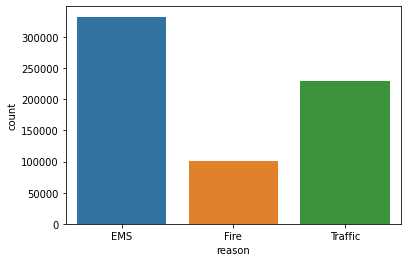

In [12]:
sns.countplot(x=df["reason"])

**What is the data type of the objects in the timeStamp column?
pd.to_datetime to convert the column from strings to DateTime objects.**

In [13]:
type(df["timeStamp"].iloc[0])

str

In [14]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

**Create 3 new columns called Hour, Month, and Day of Week**

In [15]:
df["hour"] = df["timeStamp"].apply(lambda x: x.hour)
df["month"] = df["timeStamp"].apply(lambda x: x.month)
df["dayofweek"] = df["timeStamp"].apply(lambda x: x.dayofweek)

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df["dayofweek"] = df["dayofweek"].map(dmap)

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


**Create a countplot of the Day of Week column with the hue based off of the Reason column.**

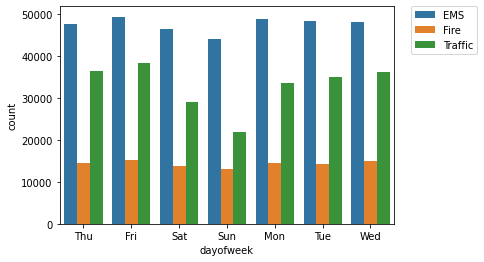

In [20]:
sns.countplot(x=df["dayofweek"], hue=df["reason"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**The same for Month**

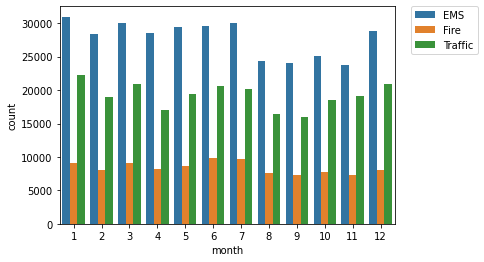

In [21]:
sns.countplot(x=df["month"], hue=df["reason"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

**Create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [22]:
byMonth = df.groupby("month").count()

In [23]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='month', ylabel='count'>

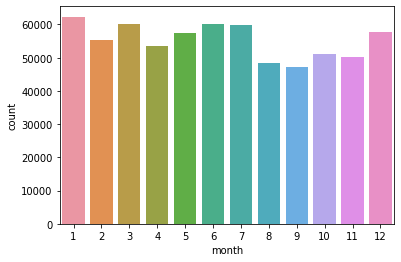

In [24]:
sns.countplot(x=df["month"])

<AxesSubplot:xlabel='month'>

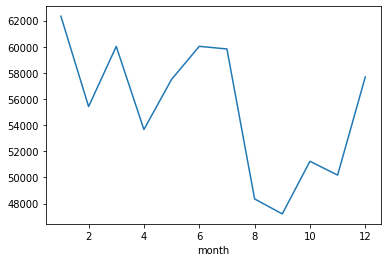

In [25]:
byMonth["lat"].plot()

**Create a linear fit on the number of calls per month.**

In [26]:
byMonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


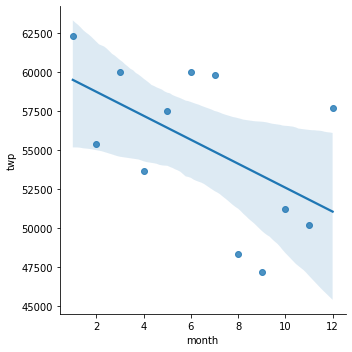

In [27]:
sns.lmplot(x="month",y="twp",data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column.**

In [28]:
df["date"] = df["timeStamp"].apply(lambda x: x.date())

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


**Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [30]:
byDate = df.groupby("date").count()

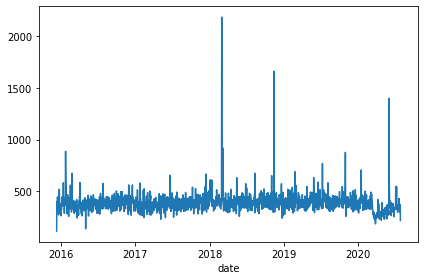

In [31]:
byDate["reason"].plot()
plt.tight_layout()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

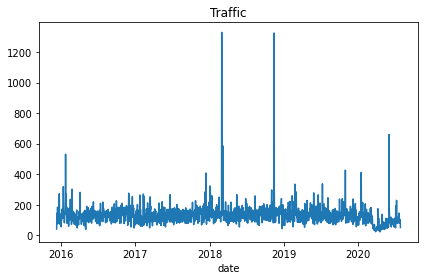

In [32]:
df[df["reason"]=="Traffic"].groupby("date").count()["reason"].plot()
plt.title("Traffic")
plt.tight_layout()

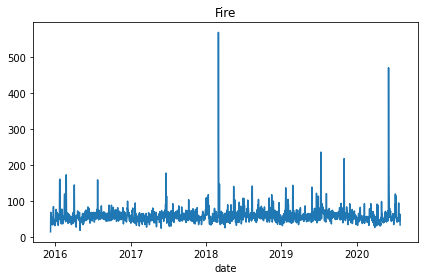

In [33]:
df[df["reason"]=="Fire"].groupby("date").count()["reason"].plot()
plt.title("Fire")
plt.tight_layout()

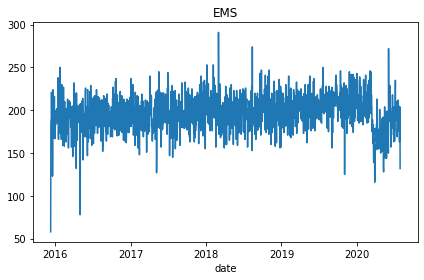

In [34]:
df[df["reason"]=="EMS"].groupby("date").count()["reason"].plot()
plt.title("EMS")
plt.tight_layout()

**Create heatmaps. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [35]:
df.groupby(by=["dayofweek", "hour"]).count()["reason"].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


**Create a HeatMap using this new DataFrame.**

In [36]:
dayHour = df.groupby(by=["dayofweek", "hour"]).count()["reason"].unstack()

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

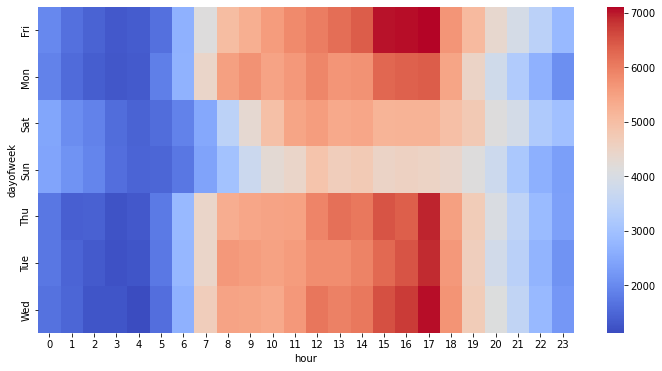

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap="coolwarm")

**Create a clustermap using this DataFrame.**

<Figure size 864x432 with 0 Axes>

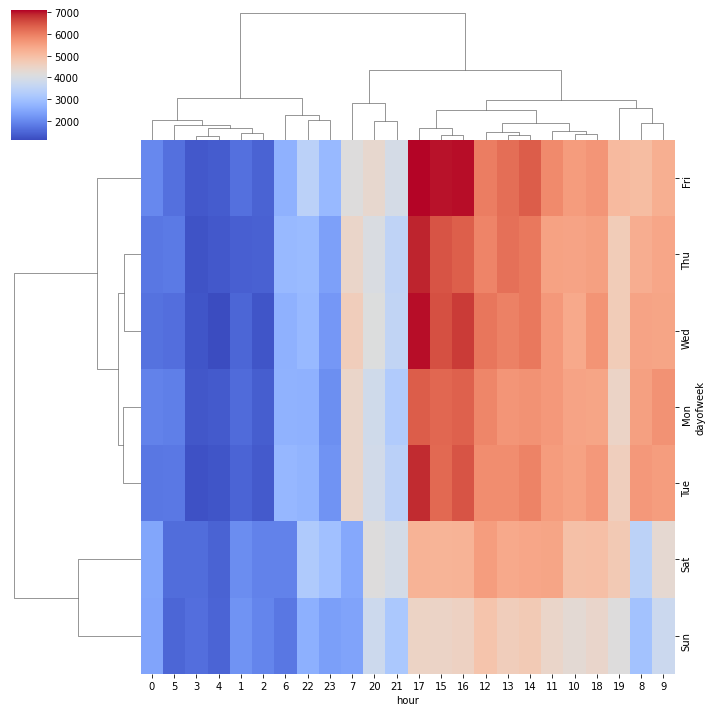

In [38]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap="coolwarm")

**Now a DataFrame that shows the Month as the column.**

In [39]:
df.groupby(by=["dayofweek", "month"]).count()["reason"].unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


In [40]:
dayMonth = df.groupby(by=["dayofweek", "month"]).count()["reason"].unstack()

<AxesSubplot:xlabel='month', ylabel='dayofweek'>

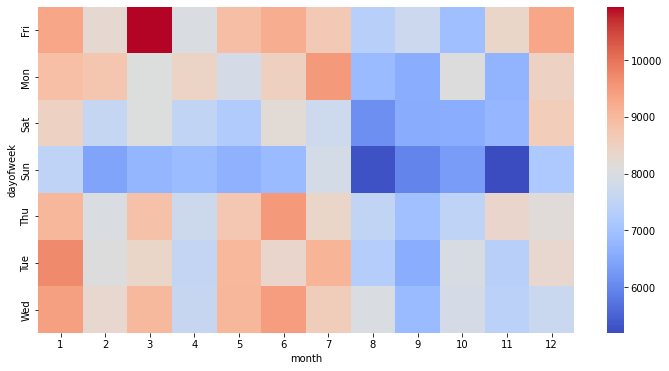

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap="coolwarm")

<Figure size 864x432 with 0 Axes>

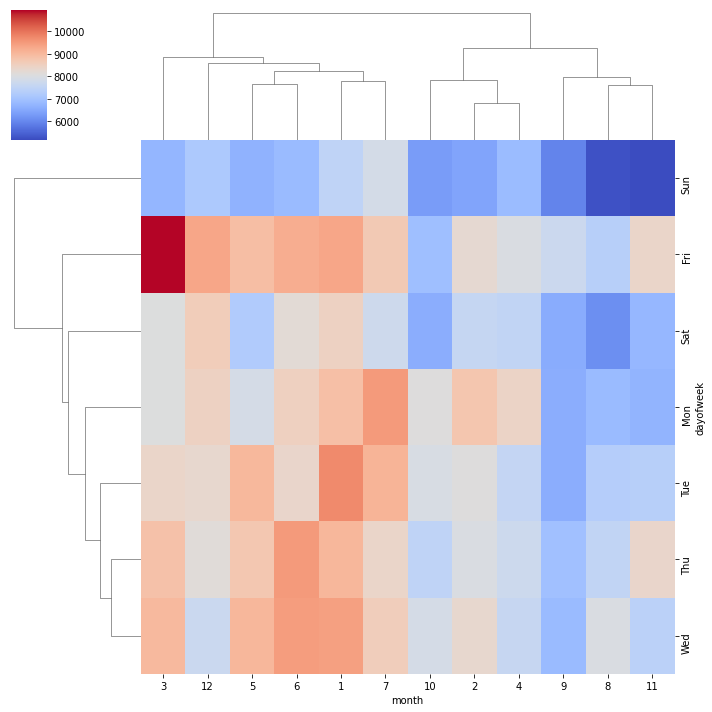

In [42]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap="coolwarm")

**Conclusion**
* Most of the calls occur on Wednesdays, Thursdays and Fridays, between 15-17 hours (3-5pm)
* Fridays in March were the busiest days in 911 call center
* The main reason for 911 calls was "EMS" followed by "Traffic" and then "Fire"